<a href="https://colab.research.google.com/github/mounikaduddukuri/S9/blob/master/QUIZ/QUIZ9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 23:41:50.199820+05:30


In [0]:
# let's mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
# calculation of mean and standard deviation
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in tqdm_notebook(train):
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print(mu, sq/n, std, n)


[0.49139968 0.48215841 0.44653091] [0.30249857 0.29176174 0.26781806] [0.24703223 0.24348513 0.26158784] 51200000


In [0]:
#
import sys
sys.path.append('/content/drive/My Drive/myLibrary')

In [0]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"


  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ymifft4v
All libraries are successfully installed!


In [0]:
import numpy as np
#import eva4datatransforms as eva4datatransforms
from torchvision import transforms
from eva4albumentations import Albumentations
channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
norm_mean_std=[channel_means,channel_stdevs]
# Train Phase transformations
train_transforms = Albumentations(norm_mean_std,Rotate=(-30.0,30.0),HorizontalFlip=True,cutout=(4,))

# Test Phase transformations
test_transforms = Albumentations(norm_mean_std)

In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import eva4dataloaders

dataloader = eva4dataloaders.DataLoader()

# train dataloader
train_loader = dataloader.load(train)

# test dataloader
test_loader = dataloader.load(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


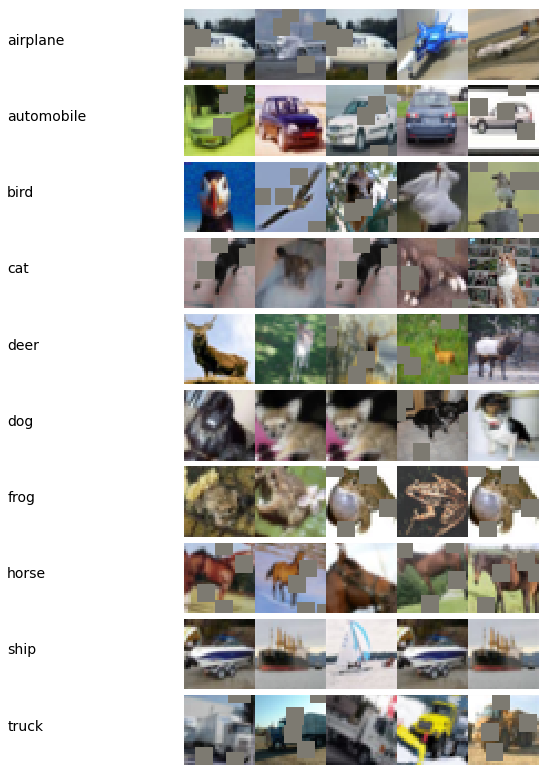

In [0]:
from __future__ import print_function
channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))
  #return np.transpose(img, (1, 2, 0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [0]:
import QuizDNN
import torch
model = QuizDNN.QuizDNN()
use_cuda = torch.cuda.is_available()
model.device = "cuda"
model.to(model.device)
model.summary((3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]           8,192
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

In [0]:
#from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 20
L2lambda = 0
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=L2lambda)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(train_loader), epochs=EPOCHS)
L1lambda = 0
model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, True, L1lambda)

Validation loss decreased (100000.000000 --> 1.300034).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0111, Accuracy: 48.40%; Test set: Average loss: 1.3000, Accuracy: 56.00%
Learning Rate = 0.052181


Validation loss decreased (1.300034 --> 1.007173).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0087, Accuracy: 60.36%; Test set: Average loss: 1.0072, Accuracy: 64.51%
Learning Rate = 0.140093


Validation loss decreased (1.007173 --> 0.913594).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0072, Accuracy: 68.11%; Test set: Average loss: 0.9136, Accuracy: 68.73%
Learning Rate = 0.260161


Validation loss decreased (0.913594 --> 0.751522).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0063, Accuracy: 72.04%; Test set: Average loss: 0.7515, Accuracy: 75.74%
Learning Rate = 0.380186


Epoch: 5, Train set: Average loss: 0.0058, Accuracy: 74.27%; Test set: Average loss: 0.7796, Accuracy: 73.32%
Learning Rate = 0.467980


Validation loss decreased (0.751522 --> 0.579115).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0053, Accuracy: 76.53%; Test set: Average loss: 0.5791, Accuracy: 80.58%
Learning Rate = 0.500000


Epoch: 7, Train set: Average loss: 0.0049, Accuracy: 78.51%; Test set: Average loss: 0.6239, Accuracy: 79.48%
Learning Rate = 0.493700


Epoch: 8, Train set: Average loss: 0.0045, Accuracy: 80.43%; Test set: Average loss: 0.6739, Accuracy: 79.18%
Learning Rate = 0.475180


Validation loss decreased (0.579115 --> 0.458014).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0042, Accuracy: 81.57%; Test set: Average loss: 0.4580, Accuracy: 84.70%
Learning Rate = 0.445369


Validation loss decreased (0.458014 --> 0.438850).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0039, Accuracy: 82.95%; Test set: Average loss: 0.4388, Accuracy: 85.29%
Learning Rate = 0.405761


Validation loss decreased (0.438850 --> 0.427991).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0036, Accuracy: 84.05%; Test set: Average loss: 0.4280, Accuracy: 85.66%
Learning Rate = 0.358342


Epoch: 12, Train set: Average loss: 0.0034, Accuracy: 85.02%; Test set: Average loss: 0.4287, Accuracy: 86.54%
Learning Rate = 0.305491


Validation loss decreased (0.427991 --> 0.352286).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0031, Accuracy: 86.07%; Test set: Average loss: 0.3523, Accuracy: 88.40%
Learning Rate = 0.249858


Epoch: 14, Train set: Average loss: 0.0029, Accuracy: 87.19%; Test set: Average loss: 0.3707, Accuracy: 88.23%
Learning Rate = 0.194231


Validation loss decreased (0.352286 --> 0.345552).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0027, Accuracy: 88.22%; Test set: Average loss: 0.3456, Accuracy: 89.00%
Learning Rate = 0.141401


Validation loss decreased (0.345552 --> 0.302202).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0024, Accuracy: 89.16%; Test set: Average loss: 0.3022, Accuracy: 89.76%
Learning Rate = 0.094017


Validation loss decreased (0.302202 --> 0.301567).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0022, Accuracy: 90.38%; Test set: Average loss: 0.3016, Accuracy: 90.36%
Learning Rate = 0.054454


Validation loss decreased (0.301567 --> 0.274887).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0019, Accuracy: 91.46%; Test set: Average loss: 0.2749, Accuracy: 91.29%
Learning Rate = 0.024697


Validation loss decreased (0.274887 --> 0.273432).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0017, Accuracy: 92.43%; Test set: Average loss: 0.2734, Accuracy: 91.32%
Learning Rate = 0.006238


Epoch: 20, Train set: Average loss: 0.0016, Accuracy: 92.75%; Test set: Average loss: 0.2736, Accuracy: 91.36%
Learning Rate = 0.000002

